<a href="https://colab.research.google.com/github/rifka1/MSIBOrbit/blob/main/Tugas_KNN_dan_Decision_Tree_(Mall_Customers_csv)_Rifka_Fariyanti_1915031027.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Tugas KNN dan Decision Tree**
Nama: Rifka Fariyanti

NPM: 1915031027

##**KNN**

Lakukan pemodelan KNN dengan k terbaik yang sudah terpilih, lakukan prediksi dan hitung akurasinya

###Memanggil Library

In [ ]:
# import libraries
import pandas as pd
import itertools
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from scipy import stats
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

###Load dataset

In [ ]:
df = pd.read_csv('/content/Mall_Customers.csv', index_col=['CustomerID'])
df

,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


In [ ]:
df = pd.read_csv('/content/Mall_Customers.csv', index_col=['CustomerID'])
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [ ]:
# Pada Genre, nilai atribut Male didefinisikan sebagai 0 dan Female didefinisikan sebagai 1
df['Genre'] = df['Genre'].map({'Male': 0,'Female': 1})
df['Genre'].value_counts()
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,0,19,15,39
2,0,21,15,81
3,1,20,16,6
4,1,23,16,77
5,1,31,17,40


###Feature set

In [ ]:
df.keys()

Index(['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [ ]:
# atribut predictor
X = df[['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [ ]:
# atribut target
Y = df['Spending Score (1-100)'].values

###Normalisasi data

In [ ]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(int))

###Pembagian data training dan testing

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (160, 4) (160,)
Test set: (40, 4) (40,)


###Training

In [ ]:
k = 2
#Train Model and Predict  
knn = KNeighborsClassifier(n_neighbors = k).fit(X_train,Y_train)
knn

KNeighborsClassifier(n_neighbors=2)

###Predicting

In [ ]:
yhat = knn.predict(X_test)
print(yhat)

[94 46 14 83 73 48 50 63 50 63 59 74 75 88 27 16 79 63  5 52 48 48 73  5
 42 34 40  5  4 27 46 36 87 73 72 48 42 42 85 42]


###Perhitungan akurasi

In [ ]:
from sklearn import metrics
print("Train set Accuracy Data Training: ", metrics.accuracy_score(Y_train, knn.predict(X_train))) #Evaluasi apakah AI berhasil training dengan baik
print("Test set Accuracy Data Test: ", metrics.accuracy_score(Y_test, yhat)) #Evaluasi apakah AI berhasil memprediksi dengan benar/ mengukur kinerja model algoritma

Train set Accuracy Data Training:  0.6
Test set Accuracy Data Test:  0.025


###Mencari nilai k terbaik

In [ ]:
Ks = 8
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,Y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(Y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==Y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.075, 0.025, 0.025, 0.025, 0.025, 0.   , 0.   ])

###Plot visualisasi data

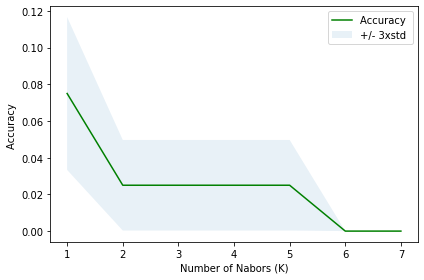

In [ ]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [ ]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.075 with k= 1


dari simulasi diketahui bahwa data dengan akurasi terbaik adalah dengan k = 4.

##**Melakukan Pemodelan KNN dengan nilai k terbaik**

###Training kembali dengan k = 1.

In [ ]:
k = 1
#Train Model and Predict  
knn = KNeighborsClassifier(n_neighbors = k).fit(X_train,Y_train)
knn

KNeighborsClassifier(n_neighbors=1)

###Predicting

In [ ]:
yhat = knn.predict(X_test)
print(yhat)

[98 46 15 83 79 50 50 63 58 63 59 74 85 95 32 32 92 63  5 55 48 52 73 14
 42 34 40  5 35 32 47 36 93 75 75 59 42 42 88 42]


###Perhitungan akurasi

In [ ]:
from sklearn import metrics
print("Train set Accuracy Data Training: ", metrics.accuracy_score(Y_train, knn.predict(X_train))) #Evaluasi apakah AI berhasil training dengan baik
print("Test set Accuracy Data Test: ", metrics.accuracy_score(Y_test, yhat)) #Evaluasi apakah AI berhasil memprediksi dengan benar/ mengukur kinerja model algoritma

Train set Accuracy Data Training:  1.0
Test set Accuracy Data Test:  0.075


##**Decision Tree**

Lakukan Klasifikasi Customer Churn dengan Decision Tree:

buat model dan gambar pohonnya
Cari feature apa yang paling penting di kasus tersebut.
Hitung akurasinya, bandingkan dengan hasil di KNN, mana kah model yang lebih baik untuk kasus Customer churn?

###Memanggil library

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

###Memanggil dataset

In [ ]:
df = pd.read_csv('/content/Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# Pada Genre, nilai atribut Male didefinisikan sebagai 0 dan Female didefinisikan sebagai 1
df['Genre'] = df['Genre'].map({'Male': 0,'Female': 1})
df['Genre'].value_counts()
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


In [ ]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [ ]:
#split dataset in features and target variable

x = df.iloc[:, :4] # Features
y = df.iloc[:, 4] # Target variable

print(x,y)

     CustomerID  Genre  Age  Annual Income (k$)
0             1      0   19                  15
1             2      0   21                  15
2             3      1   20                  16
3             4      1   23                  16
4             5      1   31                  17
..          ...    ...  ...                 ...
195         196      1   35                 120
196         197      1   45                 126
197         198      0   32                 126
198         199      0   32                 137
199         200      0   30                 137

[200 rows x 4 columns] 0      39
1      81
2       6
3      77
4      40
       ..
195    79
196    28
197    74
198    18
199    83
Name: Spending Score (1-100), Length: 200, dtype: int64


In [ ]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) # 80% training and 20% test

In [ ]:
# Create Decision Tree classifer object
df = DecisionTreeClassifier()

# Train Decision Tree Classifer
df = df.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = df.predict(X_test)

In [ ]:
# Model Accuracy
print("Train set Accuracy Data Training: ", metrics.accuracy_score(y_train, df.predict(X_train))) #Evaluasi apakah AI berhasil training dengan baik
print("Test set Accuracy Data Test: ", metrics.accuracy_score(y_test, y_pred)) #Evaluasi apakah AI berhasil memprediksi dengan benar/ mengukur kinerja model algoritma

Train set Accuracy Data Training:  1.0
Test set Accuracy Data Test:  0.025


In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

feature_cols = ['CustomerID', 'Genre', 'Age', 'Annual Income (k$)']
dot_data = StringIO()
export_graphviz(df, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, 
                feature_names = feature_cols)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('customers.png')
Image(graph.create_png())

Feature: CustomerID Score:  0.29396254411012585 %
Feature: Genre Score:  0.10227569514764136 %
Feature: Age Score:  0.2971450344933117 %
Feature: Annual Income (k$) Score:  0.30661672624892106 %


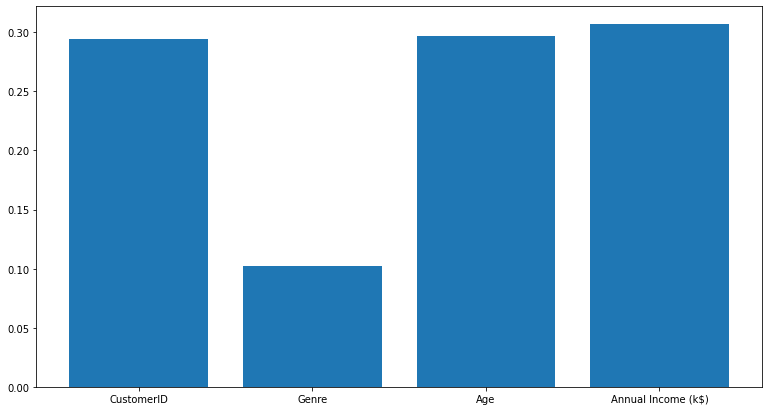

In [ ]:
import matplotlib.pyplot as plt

importance = df.feature_importances_
for i,v in enumerate(importance):
	print('Feature:', feature_cols[i],'Score: ', v, '%')
# plot feature importance
plt.figure(figsize=(13,7))
plt.bar([x for x in feature_cols], importance)
plt.show()